<a href="https://colab.research.google.com/github/nasnah-hansan/Pandas/blob/main/Pandas_practice_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 과제 1: 데이터 로드 및 초기 탐색 (정제 준비)

- 데이터 로드 및 확인: CSV 파일을 DataFrame으로 로드하고, 처음 5개 행을 확인하세요.

- 구조 파악: info() 메서드를 사용하여 전체 행 수, 결측치가 있는 열, 그리고 각 열의 데이터 타입 (dtype)을 확인하고 정리하세요.

- 통계 요약: describe() 메서드를 사용하여 숫자형 열의 최소값, 최대값, 평균, 표준편차 등을 빠르게 확인하고 이상치를 대략적으로 파악하세요.

🚀 과제 2: 결측치 및 오류 처리 (정제)

- 결측치 확인: 각 열의 결측치 개수와 비율을 계산하세요. (isnull().sum() / len(df) * 100)

- 결측치 처리 전략:

    > 비율이 높은 열: 결측치 비율이 50%를 초과하는 열이 있다면, 해당 열을 DataFrame에서 제거하세요. (dropna(axis=1))

    > 중요 열: 핵심 분석에 필요한 열 (예: 가격, 수량)에 결측치가 있다면, 평균 또는 중앙값으로 대체하세요. (fillna())

    > 범주형 열: 범주형 열의 결측치는 'Unknown' 또는 최빈값으로 대체하세요.

🚀 과제 3: 데이터 변환 및 파생 변수 생성 (변환)

- 타입 변환: 날짜/시간 정보를 포함하는 열이 있다면, pd.to_datetime()을 사용하여 datetime 타입으로 정확히 변환하세요.

- 파생 변수 생성: 분석에 유용한 새로운 열을 만드세요. 예를 들어, '구매 금액'과 '할인율'이 있다면 '실제 지불액' 열을 계산하여 추가하세요. (힌트: 벡터화 연산 활용)

🚀 과제 4: 그룹화 및 집계 분석 (분석)

- 핵심 지표 산출: 특정 범주형 열 (예: '국가', '제품 카테고리')을 기준으로 **groupby()**를 사용하여 다음을 수행하세요.

- 그룹별 평균, 합계, 개수를 동시에 계산하세요. (agg() 활용)

- 가장 거래액이 높은 상위 5개 그룹을 찾으세요. (sort_values() 활용)

🚀 과제 5: 데이터 선택 및 조건부 처리 (숙련도)

- 복합 조건 필터링: loc[] 또는 부울 마스킹을 사용하여 '가격이 100 이상' 이면서 '지역이 서울'인 데이터만 추출하세요.
- 조건부 값 변경: 특정 조건 (예: '나이'가 60세 이상)을 만족하는 행의 '등급' 열 값을 'Gold'에서 **'VIP'**로 변경하세요.


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import os

In [ ]:
# 폴더에 있는 파일명 가져오기
file_names = os.listdir('/content/drive/MyDrive/Colab Notebooks/Ecommerce Order Dataset/train')

variable_names = []
for name in file_names:
  variable_names.append(name[:-4])
print(variable_names)
# 두개의 문자 사이를 자르는 것은 좀 더 복잡한 것 같음
# for name in file_names:
#   variable_names.append(name.split('_'))

['df_OrderItems', 'df_Customers', 'df_Orders', 'df_Payments', 'df_Products']


In [ ]:


for i in variable_names:
  globals()['{}'.format(i)] = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecommerce Order Dataset/train/{}.csv'.format(i))
  # unique는 중복되지 않는 data의 갯수
  print("{}".format(i))
  print("+++++++++++++++++++++++++++++++++++++")
  print(globals()['{}'.format(i)].info())
  print("+++++++++++++++++++++++++++++++++++++")
  print(globals()['{}'.format(i)].describe(include='all'))
  print("-------------------------------------")

df_OrderItems
+++++++++++++++++++++++++++++++++++++
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          89316 non-null  object 
 1   product_id        89316 non-null  object 
 2   seller_id         89316 non-null  object 
 3   price             89316 non-null  float64
 4   shipping_charges  89316 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.4+ MB
None
+++++++++++++++++++++++++++++++++++++
            order_id    product_id     seller_id         price  \
count          89316         89316         89316  89316.000000   
unique         89316         27451          2929           NaN   
top     Xo1fqyXOC6CR  0vbEvli2JYJu  RKad98cTxhSb           NaN   
freq               1           405          1657           NaN   
mean             NaN           NaN           NaN    340.900543   
std              NaN

In [ ]:
# df_Orders에 결측률이 2% 이상인 열을 삭제한다. (원래는 숫자가 높을수록 열을 제거한다)
drop_rate = 0.02
print((1-drop_rate)*len(df_Orders))
df_Orders.dropna(axis=1, thresh=(1-drop_rate)*len(df_Orders))

87529.68


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-18
...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-17


In [ ]:
# seaborn - 정적시각화의 표준
import seaborn as sns
import matplotlib.pyplot as plt

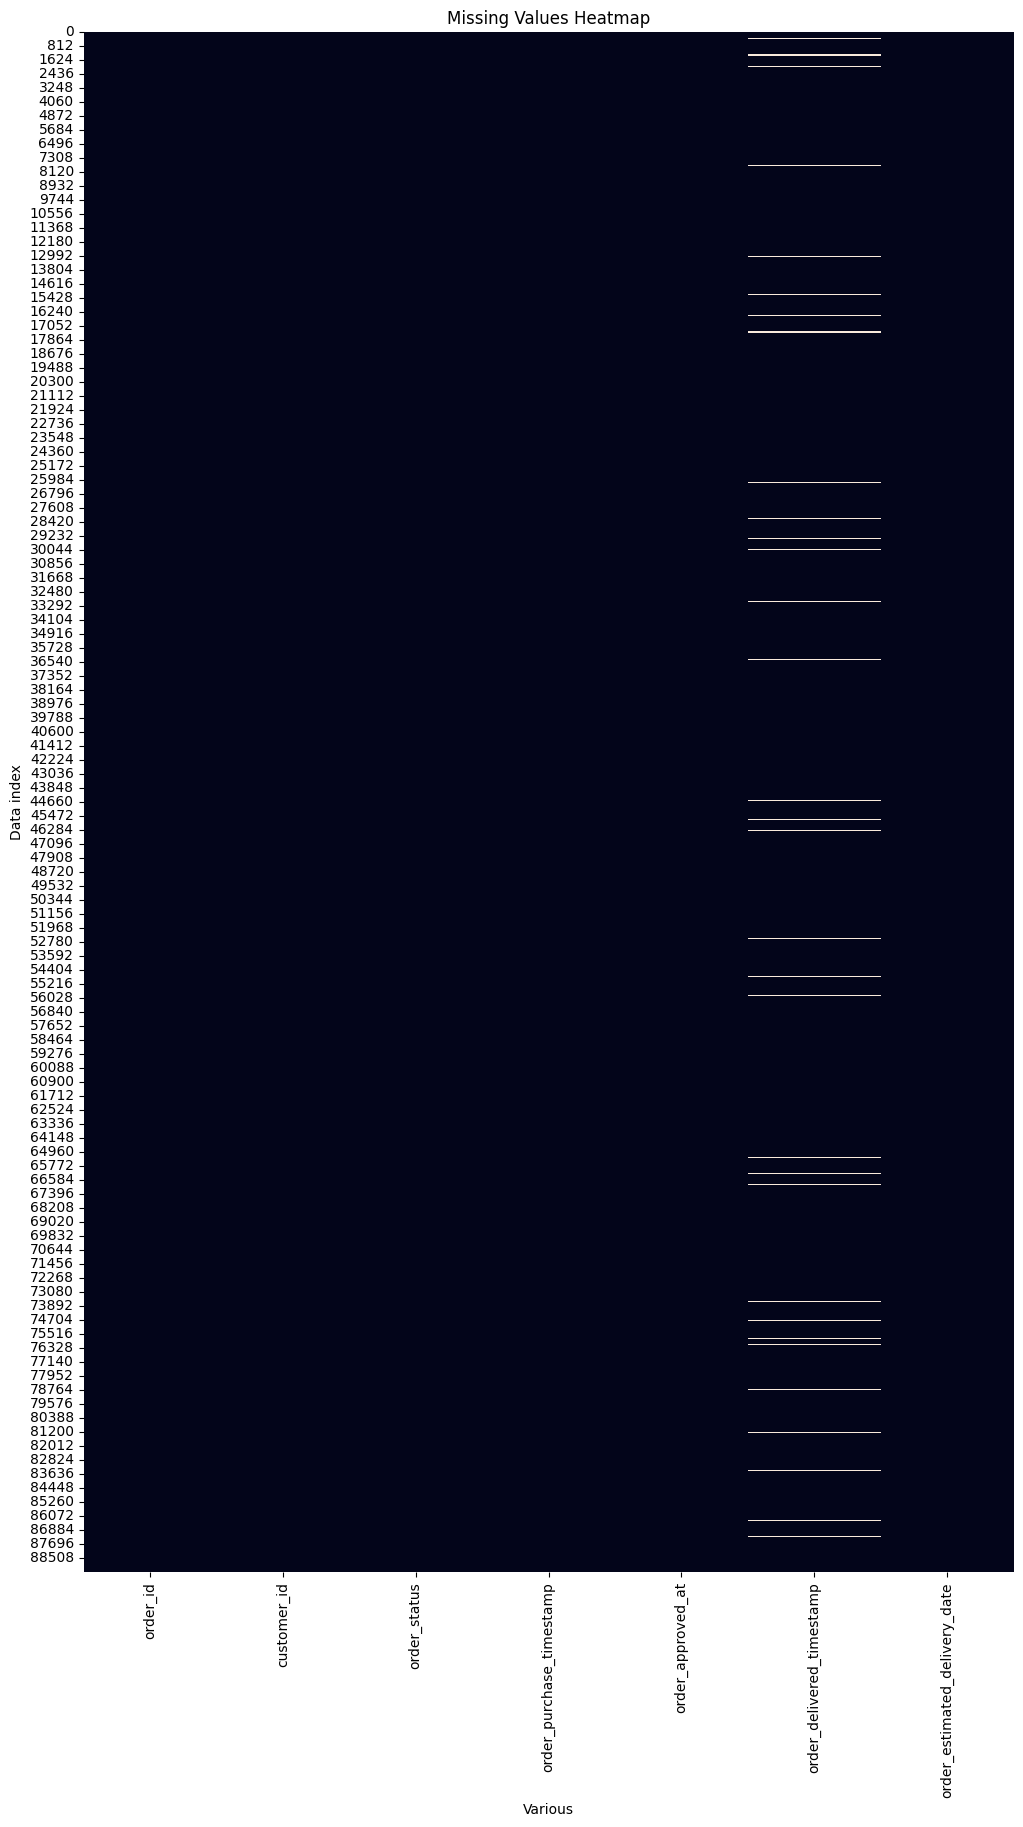

In [ ]:
# 결측치 시각화
plt.figure(figsize=(12, 20))
sns.heatmap(df_Orders.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Various')
plt.ylabel('Data index')
plt.show()

<Axes: >

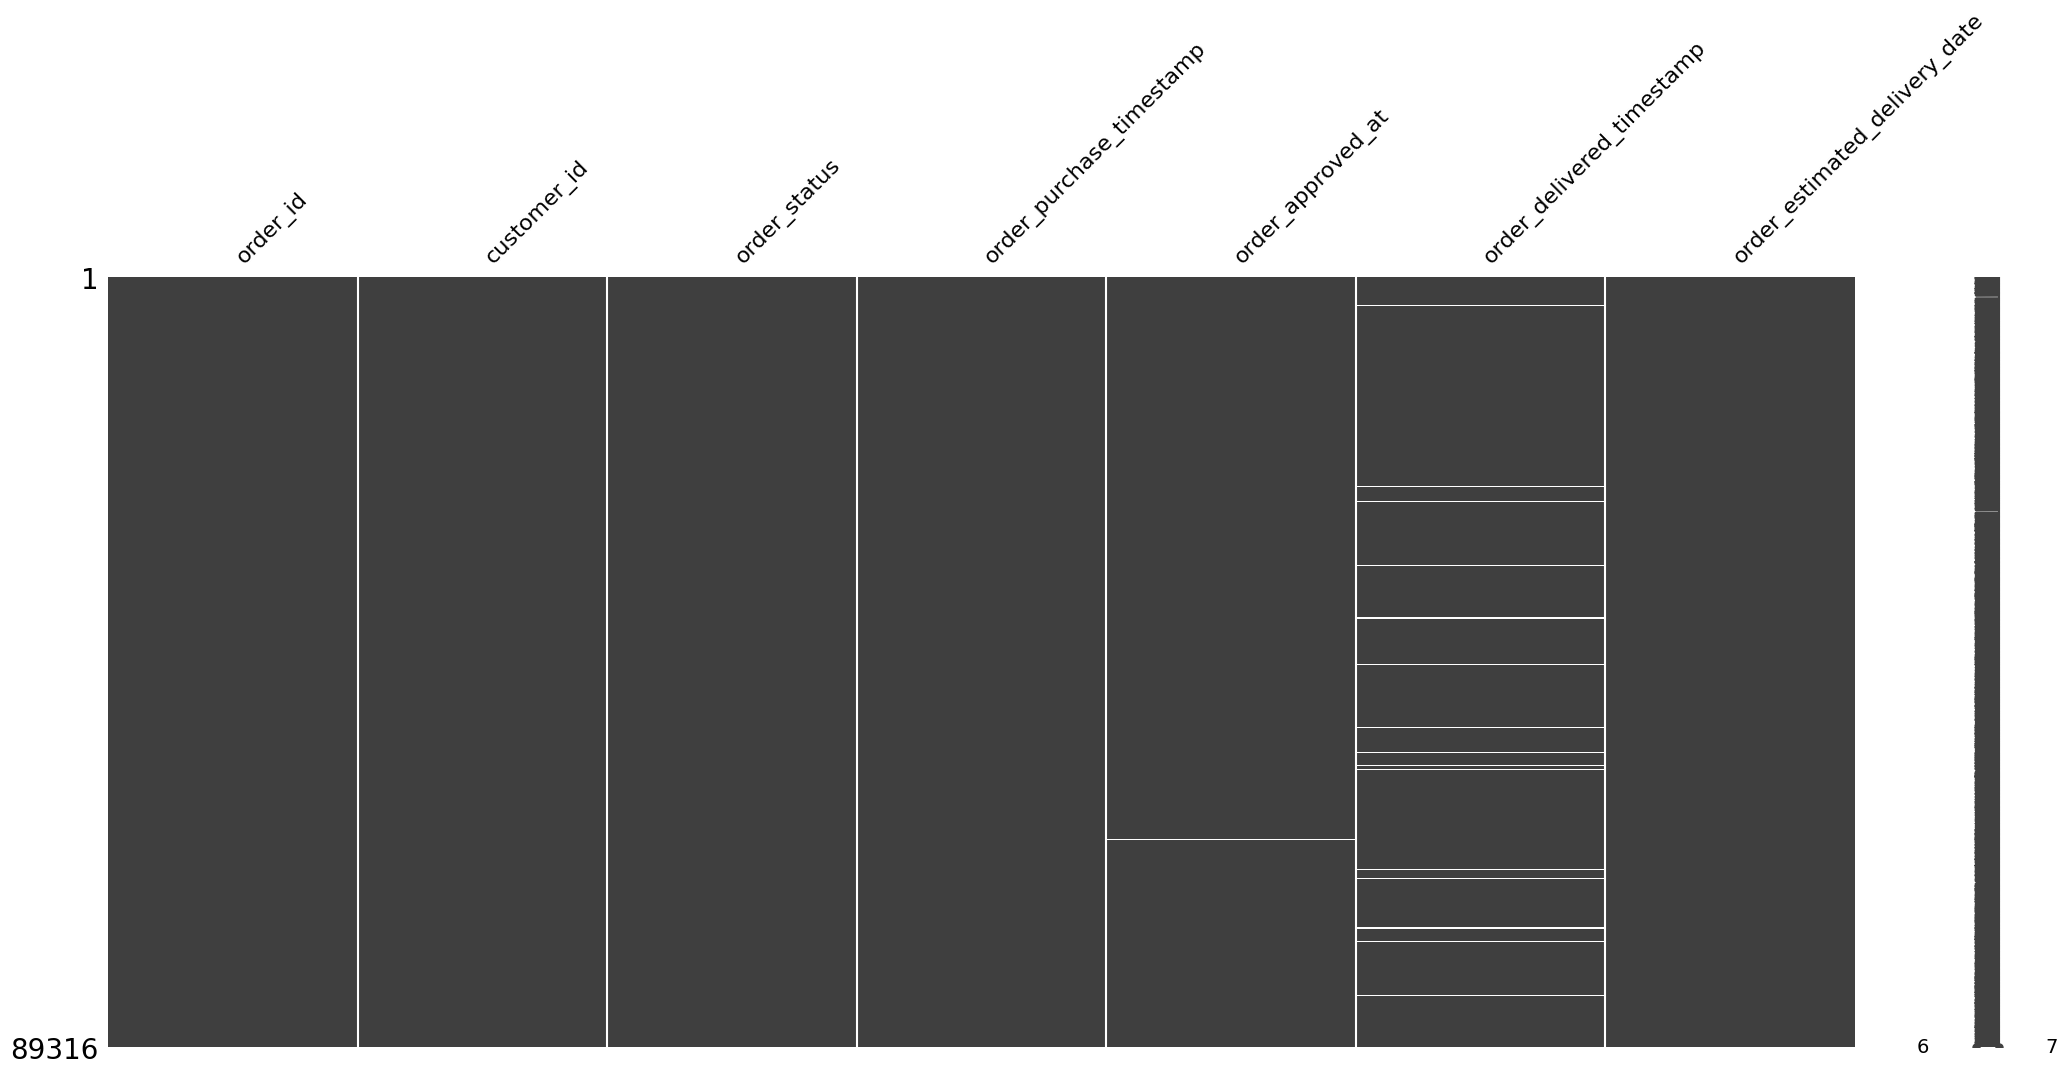

In [ ]:
import missingno as msno
msno.matrix(df_Orders)

In [ ]:
# 시각화를 해도 이해할 수 없다. order_state와 delivery time stamp관계를 파악해야겠다
df_Orders['order_status'].value_counts()

,count
order_status,
delivered,87428
shipped,936
canceled,409
processing,273
invoiced,266
unavailable,2
approved,2


In [ ]:
# 'order_status'로 그룹화하여 'order_delivered_timestamp'의 결측치 개수 확인
missing_by_status = df_Orders.groupby('order_status')['order_delivered_timestamp'].apply(lambda x: x.isnull().sum())
print(missing_by_status)
# 전체 데이터 대비 비율(%) 계산
total_by_status = df_Orders['order_status'].value_counts()
print(total_by_status)
missing_ratio = (missing_by_status / total_by_status * 100).sort_values(ascending=False)

# 결과 합치기
status_analysis = pd.DataFrame({
    'Missing Count': missing_by_status,
    'Total Count': total_by_status,
    'Missing Ratio (%)': missing_ratio
})

print(status_analysis)

order_status
approved         2
canceled       404
delivered        6
invoiced       266
processing     273
shipped        936
unavailable      2
Name: order_delivered_timestamp, dtype: int64
order_status
delivered      87428
shipped          936
canceled         409
processing       273
invoiced         266
unavailable        2
approved           2
Name: count, dtype: int64
              Missing Count  Total Count  Missing Ratio (%)
order_status                                               
approved                  2            2         100.000000
canceled                404          409          98.777506
delivered                 6        87428           0.006863
invoiced                266          266         100.000000
processing              273          273         100.000000
shipped                 936          936         100.000000
unavailable               2            2         100.000000


1. dropna()의 thresh 파라미터 활용
dropna()에는 thresh라는 파라미터가 있습니다. 이는 **"결측치가 아닌 정상 값이 최소 n개 이상 있어야 한다"**는 조건을 의미합니다.

원리: (전체 행 수) - (허용할 최대 결측치 수) = 남겨야 할 최소 정상 데이터 수

예시: 결측률이 30% 이상인 열을 삭제하고 싶다면, 반대로 정상 값이 70% 이상이어야 합니다.


```
# 전체 행의 70% 이상이 정상 데이터인 열만 남기기
threshold = len(df) * 0.7
df_cleaned = df.dropna(axis=1, thresh=threshold)
```
참고: thresh는 '삭제할 기준'이 아니라 **'유지하기 위한 최소한의 정상 데이터 개수'**를 의미한다는 점에 주의하세요!

2. 불리언 인덱싱을 활용한 정교한 삭제 (추천)
thresh 파라미터는 직관적이지 않을 때가 많습니다. 데이터사이언티스트들은 가독성을 위해 아래와 같이 결측률을 직접 계산하여 필터링하는 방식을 더 선호합니다.

```
# 1. 각 열별 결측률 계산
missing_rate = df.isnull().mean()

# 2. 결측률이 30%(0.3) 미만인 열들의 이름만 추출
cols_to_keep = missing_rate[missing_rate < 0.3].index

# 3. 해당 열들만 선택
df_cleaned = df[cols_to_keep]
```
이 방식의 장점:

0.3이라는 수치를 코드에 직접 노출하여 동료가 봐도 의도를 쉽게 파악할 수 있습니다.

결측률뿐만 아니라 다른 복합적인 조건(예: 결측률 30% 미만이면서 특정 키워드를 포함하는 열 등)을 붙이기 용이합니다.

In [ ]:
# 결측치를 제거 하는 방법
# 결측률의 기준을 행으로 잡을지 열로 잡을지에 따라 방법이 달라진다
# 이 문서 초반에는 한 열의 결측률이 일정 비율 이상이 된다면 제거하라고 했다
test = {
    'Name': ['Alice', 'Bob', 'Aritra'],
    'Age': [25, np.nan, np.nan],
    'Location': [np.nan, 'New York', 'Kona'],
    'Salary': [np.nan, 50000, 60000]
}
df_test = pd.DataFrame(test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      3 non-null      object 
 1   Age       1 non-null      float64
 2   Location  2 non-null      object 
 3   Salary    2 non-null      float64
dtypes: float64(2), object(2)
memory usage: 228.0+ bytes


In [ ]:
# dropna의 'thresh'는 남아 있어야 하는 data 기준이다.
# 즉 threshold*전체 행의 갯수=남아있어야 하는 하는 data 갯수이다
# 보통은 '결측치가 몇% 이상이면 그 열을 제거한다'가 일반적이다.
# 즉, dropna의 thresh는 유의한 data의 갯수가 몇개 이상인 열을 **남긴다**.
threshold = 0.7
missing_rate = df_test.isnull().mean()
# 컬럼의 NA가 아닌 갯수가 thresh 수 이상인
df_cleaned = df_test.dropna(axis=1, thresh=threshold*len(df_test))
print(df_cleaned)

     Name
0   Alice
1     Bob
2  Aritra
2.0999999999999996


In [ ]:
# dropna와 다르게 이 방법은 threshold를 넘는 = 결측률이 threshold 미만인 index(column)만 남긴다.
threshold = 0.7
missing_rate = df_test.isnull().mean()
cols_to_keep = missing_rate[missing_rate < threshold].index
df_cleaned = df_test[cols_to_keep]
print(df_cleaned)


     Name   Age  Location   Salary
0   Alice  25.0       NaN      NaN
1     Bob   NaN  New York  50000.0
2  Aritra   NaN      Kona  60000.0
